# Notebook Summary:

**Question Solved for World Bank: Education Data** :

Question 1: How has the mortality rate for an adult changed in Canada for a male compared to female?

Question 2: What's the difference in the children population percentage based on income class, and how has it changed?

Question 3: How has the Canadian population overweight percentage changed when comparing males and females?

Question 4: What has the North American country's unemployment percentage of total labor force mostly been since 1991?

Question 5: Has smoking prevalence had an impact on life expectancy for males and females?


Question 6: Create an XGBoost machine learning model that predicts the population growth of Canada for 2019.

#---------------------------------------------------------------------------

#Previous Work:

Data Set name:Bitcoin Blockchain Historical Data(Complete historical Bitcoin blockchain data (BigQuery))

# Blockchain System Anomaly Detection with Big Query & Machine learning Algorithms(IsolationForest & K-means)


---------------------------------------------------------------------------

# (*)Air Quality forcesing with Time series with ML 

1. (models: ARIMA,Autoregression (AR)
1. Moving Average (MA)
1. Autoregressive Moving Average (ARMA)
1. Autoregressive Integrated Moving Average (ARIMA)
1. Seasonal Autoregressive Integrated Moving-Average (SARIMA))


---------------------------------------------------------------

Dataset: Medicare Data 

#  BigQuery for Deep Healthcare Analysis

Sample code:https://www.kaggle.com/sohelranaccselab/bigquery-for-deep-healthcare-analysis

--------------------------------------------------------------


Inprogress:Data set name;

(1)Google Analytics Sample data set

(2)ChEMBL EBI Small Molecules Database 

(3)World Development Indicators (WDI) Data


**********************************************************************

Github links for AI, Data Science & Remote Sensing Projects:

https://github.com/sohel-ccse

------------------------------------------

Researchgate Profile Link for Research projects & Publication:

https://www.researchgate.net/profile/Sohel_Rana5/research




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
from google.cloud import bigquery

# Retrieving Data

In [4]:
client = bigquery.Client()

dataset_ref = client.dataset('world_bank_health_population', project='bigquery-public-data')

dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


# Viewing tables

In [5]:
tables = list(client.list_tables(dataset))

list_of_tables = [table.table_id for table in tables]

print(list_of_tables)

['country_series_definitions', 'country_summary', 'health_nutrition_population', 'series_summary', 'series_times']


In [6]:
table_ref = dataset_ref.table('country_series_definitions')

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,country_code,series_code,description
0,ALB,SP.POP.TOTL,"Data source: Institute of Statistics, Eurostat"
1,ARG,SP.POP.TOTL,"Data source: National Institute of Statistics and Censuses, United Nations World Population Prospects"
2,ARG,SP.POP.GROW,"Data source: National Institute of Statistics and Censuses, United Nations World Population Prospects"
3,AUT,SP.DYN.LE00.MA.IN,"Data source: Eurostat, Statistik Austria"
4,AUT,SP.DYN.LE00.FE.IN,"Data source: Eurostat, Statistik Austria"


In [7]:
table_ref = dataset_ref.table('country_summary')

In [8]:
table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,country_code,short_name,table_name,long_name,two_alpha_code,currency_unit,special_notes,region,income_group,wb_2_code,national_accounts_base_year,national_accounts_reference_year,sna_price_valuation,lending_category,other_groups,system_of_national_accounts,alternative_conversion_factor,ppp_survey_year,balance_of_payments_manual_in_use,external_debt_reporting_status,system_of_trade,government_accounting_concept,imf_data_dissemination_standard,latest_population_census,latest_household_survey,source_of_most_recent_income_and_expenditure_data,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,latest_water_withdrawal_data
0,ARB,Arab World,Arab World,Arab World,1A,None,Arab World aggregate. Arab World is composed of members of the League of Arab States.,None,None,1A,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016,None
1,CEB,Central Europe and the Baltics,Central Europe and the Baltics,Central Europe and the Baltics,B8,None,Central Europe and the Baltics aggregate.,None,None,B8,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016,None
2,CSS,Caribbean small states,Caribbean small states,Caribbean small states,S3,None,None,None,None,S3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016,None
3,EAP,East Asia & Pacific (excluding high income),East Asia & Pacific (excluding high income),East Asia & Pacific (excluding high income),4E,None,East Asia and Pacific regional aggregate (does not include high-income economies).,None,None,4E,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016,None
4,EAR,Early-demographic dividend,Early-demographic dividend,Early-demographic dividend,V2,None,Early-dividend countries are mostly lower-middle-income countries further along the fertility transition. Fertility rates have fallen below four births per woman and the working-age share of the population is likely rising considerably.,None,None,V2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2016,None


In [9]:
table_ref = dataset_ref.table('health_nutrition_population')

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,country_name,country_code,indicator_name,indicator_code,value,year
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,134.772341,1960
1,Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,135.343859,1961
2,Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,136.030214,1962
3,Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,135.898025,1963
4,Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,135.721826,1964


In [10]:
table_ref = dataset_ref.table('series_summary')

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,series_code,topic,indicator_name,short_definition,long_definition,unit_of_measure,periodicity,base_period,other_notes,aggregation_method,limitations_and_exceptions,notes_from_original_source,general_comments,source,statistical_concept_and_methodology,development_relevance,related_source_links,other_web_links,related_indicators,license_type
0,SH.MLR.IPTP.ZS,Health: Disease prevention,Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),"Percentage of women aged 15 - 49 with a live birth in the recent years preceding the survey who received 3+ doses of sulfadoxine-pyrimethamine (SP/Fansidar), at least one during an antenatal care visit.","Percentage of women aged 15 - 49 with a live birth in the recent years preceding the survey who received 3+ doses of sulfadoxine-pyrimethamine (SP/Fansidar), at least one during an antenatal care visit. Intermittent Preventive Treatment (IPT) is preventive treatment with SP/Fansidar during an antenatal care (ANC) visit treatment with a dose of sulfadoxine-pyrimethamine (SP/Fansidar) to pregnant women at each scheduled antenatal visit after the first trimester, but not more frequently than once a month.",None,Annual,None,None,Weighted average,None,None,None,"UNICEF Global Databases [data.unicef.org], Multiple Indicator Cluster Surveys, Demographic and Health Surveys.",None,"Malaria infection during pregnancy is a serious public health concern. It carries substantial risks for the mother, her fetus and the neonate including anaemia, severe malaria, spontaneous abortion, stillbirth, prematurity, neonatal mortality and low birthweight. Intermittent preventive treatment of malaria in pregnancy is a full therapeutic course of antimalarial medicine given to pregnant women at routine antenatal care visits, regardless of whether the recipient is infected with malaria. IPTp reduces maternal malaria episodes, maternal and fetal anaemia, placental parasitaemia, low birth weight, and neonatal mortality.",None,None,None,None
1,SH.PRG.SYPH.ZS,Health: Risk factors,Prevalence of syphilis (% of women attending antenatal care),Percentage of women attending antenatal care seropositive for syphilis,Percentage of women attending antenatal care seropositive for syphilis,None,Annual,None,None,None,None,None,None,World Health Organization's Global Health Observatory Data Repository,None,None,None,None,None,CC BY-4.0
2,SH.UHC.SRVS.CV.XD,Health: Universal Health Coverage,UHC service coverage index,UHC service coverage index,"Coverage index for essential health services (based on tracer interventions that include reproductive, maternal, newborn and child health, infectious diseases, noncommunicable diseases and service capacity and access). It is presented on a scale of 0 to 100.",None,Annual,None,None,Weighted average,None,None,None,"World Health Organization, Global Health Observatory Data Repository (https://www.who.int/data/gho).","Under SDG 3.8.1, four categories were defined RMNCH, infectious diseases, non-communicable diseases and service capacity and access. Each category contains several tracers. The index is constructed from geometric means of the tracer indicators; first, within each of the four categories, and then across the four category-specific means to obtain the final summary index. See Source for details about methodology.","Universal Health Coverage (UHC) is about ensuring that all people can access the health services they need – without facing financial hardship – is key to improving the well-being of a country’s population. UHC is also an investment in human capital and a foundational driver of inclusive and sustainable economic growth and development. UHC is a target associated with the Sustainable Development Goals (target 3.8), and it relates directly to Goal 3 (Ensure healthy lives and promote well-being for all at all ages) and to Goal 1 (End poverty in all its forms everywhere).",None,None,None,CC BY-4.0
3,SP.POP.GROW,Health: Population: Dynamics,Population gr

In [11]:
table_ref = dataset_ref.table('series_times')

table = client.get_table(table_ref)

client.list_rows(table, max_results=5).to_dataframe()

,series_code,year,description
0,SH.STA.MALR,2012,"Source: WHO ""World Malaria Report 2013"""
1,SP.ADO.TFRT,2018,Interpolated using data for 2017 and 2022
2,SM.POP.NETM,1962,"The data refer to five-year periods running from 1 July, 1960 to 30 June, 1965."
3,SM.POP.NETM,1967,"The data refer to five-year periods running from 1 July, 1965 to 30 June, 1970."
4,SM.POP.NETM,1972,"The data refer to five-year periods running from 1 July, 1970 to 30 June, 1975."


# Viewing series codes and what they mean

In [12]:
qseries = '''
     SELECT DISTINCT series_code, topic, indicator_name
     FROM `bigquery-public-data.world_bank_health_population.series_summary`
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
qseries_job = client.query(qseries, job_config=safe_config)

qseries_results = qseries_job.to_dataframe()

qseries_results

,series_code,topic,indicator_name
0,SH.MLR.IPTP.ZS,Health: Disease prevention,Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)
1,SH.PRG.SYPH.ZS,Health: Risk factors,Prevalence of syphilis (% of women attending antenatal care)
2,SH.UHC.SRVS.CV.XD,Health: Universal Health Coverage,UHC service coverage index
3,SP.POP.GROW,Health: Population: Dynamics,Population growth (annual %)
4,SH.STA.IYCF.ZS,Health: Nutrition,"Infant and young child feeding practices, all 3 IYCF (% children ages 6-23 months)"
5,SH.STA.PNVC.ZS,Health: Reproductive health,Postnatal care coverage (% mothers)
6,SM.POP.NETM,Social Protection & Labor: Migration,Net migration
7,SH.STA.OWAD.FE.ZS,Health: Nutrition,"Prevalence of overweight, female (% of female adults)"
8,SH.STA.OWAD.MA.ZS,Health: Nutrition,"Prevalence of overweight, male (% of male adults)"
9,SH.STA.OWAD.ZS,Health: Nutrition,Prevalence of overweight (% of adults)


# Solving Questions
Question 1: How has the mortality rate for an adult changed in Canada for a male compared to female?

In [13]:
q1 = '''
     SELECT country_name, indicator_name, year, value
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
     WHERE indicator_code = 'SP.DYN.AMRT.MA' AND country_name = 'Canada' OR indicator_code = 'SP.DYN.AMRT.FE' AND country_name = 'Canada'
     ORDER BY year
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q1_job = client.query(q1, job_config=safe_config)

q1_results = q1_job.to_dataframe()

q1_results

,country_name,indicator_name,year,value
0,Canada,"Mortality rate, adult, female (per 1,000 female adults)",1960,109.671
1,Canada,"Mortality rate, adult, male (per 1,000 male adults)",1960,192.876
2,Canada,"Mortality rate, adult, female (per 1,000 female adults)",1961,106.471
3,Canada,"Mortality rate, adult, male (per 1,000 male adults)",1961,190.728
4,Canada,"Mortality rate, adult, female (per 1,000 female adults)",1962,108.087
5,Canada,"Mortality rate, adult, male (per 1,000 male adults)",1962,191.161
6,Canada,"Mortality rate, adult, female (per 1,000 female adults)",1963,106.692
7,Canada,"Mortality rate, adult, male (per 1,000 male adults)",1963,191.753
8,Canada,"Mortality rate, adult, female (per 1,000 female adults)",1964,104.377
9,Canada,"Mortality rate, adult, male (per 1,000 male adults)",1964,191.376


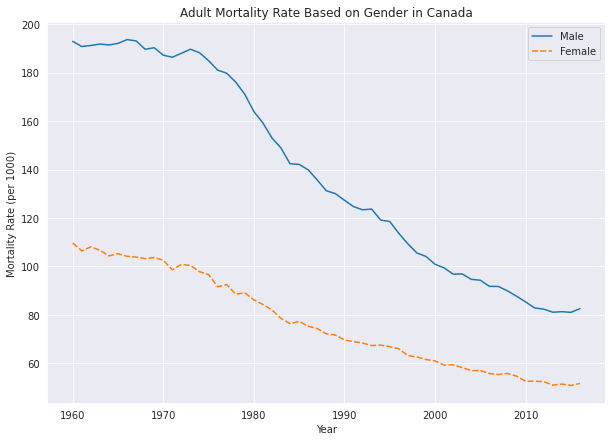

In [14]:
q1 = q1_results[['year', 'value']]

year_lst = []
for x in q1['year']:
    year_lst.append(x)
year_lst = year_lst[0::2]

male_lst = []
for x in q1['value']:
    male_lst.append(x)
male_lst = male_lst[1::2]

female_lst = []
for x in q1['value']:
    female_lst.append(x)
female_lst = female_lst[0::2]

q1_data = {'Year': year_lst,
           'Male': male_lst,
           'Female': female_lst
          }

q1_df = pd.DataFrame(q1_data, columns = ['Year','Male', 'Female'])
q1_df = q1_df.set_index('Year')

plt.figure(figsize=(10,7))
plt.title('Adult Mortality Rate Based on Gender in Canada')
plt.ylabel('Mortality Rate (per 1000)')
sns.lineplot(data=q1_df)

Answer 1: Both male and female adults are expected to live longer in Canada now then in comparrison to 1960!

1. Question 2: What's the difference in the children population percentage based on income class, and how has it changed?

In [15]:
q2 = '''
     SELECT country_name, indicator_name, year, value
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
     WHERE indicator_code = 'SP.POP.0014.TO.ZS' AND country_name = 'High income' 
         OR indicator_code = 'SP.POP.0014.TO.ZS' AND country_name = 'Middle income' 
         OR indicator_code = 'SP.POP.0014.TO.ZS' AND country_name = 'Low income'
     ORDER BY year
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q2_job = client.query(q2, job_config=safe_config)

q2_results = q2_job.to_dataframe()

q2_results

,country_name,indicator_name,year,value
0,High income,Population ages 0-14 (% of total population),1960,29.004171
1,Low income,Population ages 0-14 (% of total population),1960,42.593324
2,Middle income,Population ages 0-14 (% of total population),1960,39.822253
3,High income,Population ages 0-14 (% of total population),1961,28.999127
4,Low income,Population ages 0-14 (% of total population),1961,42.884962
5,Middle income,Population ages 0-14 (% of total population),1961,40.061547
6,High income,Population ages 0-14 (% of total population),1962,28.880030
7,Low income,Population ages 0-14 (% of total population),1962,43.024972
8,Middle income,Population ages 0-14 (% of total population),1962,40.396338
9,High income,Population ages 0-14 (% of total population),1963,28.682404


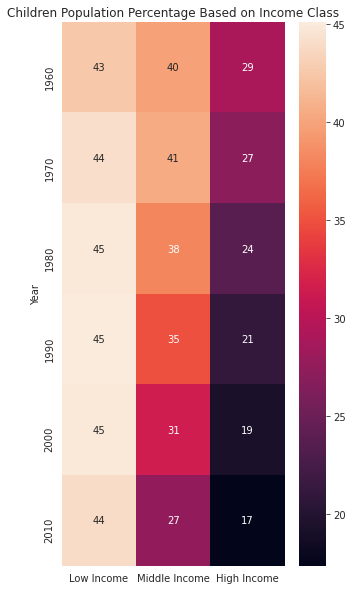

In [16]:
q2 = q2_results[['year', 'value']]

year_lst = []
for x in q2['year']:
    year_lst.append(x)
year_lst = year_lst[0::3]

high_income_lst = []
for x in q2['value']:
    high_income_lst.append(x)
high_income_lst = high_income_lst[0::3]

low_income_lst = []
for x in q2['value']:
    low_income_lst.append(x)
low_income_lst = low_income_lst[1::3]

middle_income_lst = []
for x in q2['value']:
    middle_income_lst.append(x)
middle_income_lst = middle_income_lst[2::3]

q2_data = {'Year': year_lst,
           'Low Income': low_income_lst,
           'Middle Income': middle_income_lst,
           'High Income': high_income_lst
          }

q2_df = pd.DataFrame(q2_data, columns=['Year', 'Low Income', 'Middle Income', 'High Income'])
q2_df = q2_df.set_index('Year')
q2_df = q2_df.iloc[0::10]
q2_df

plt.figure(figsize=(5,10))
plt.title('Children Population Percentage Based on Income Class')
sns.heatmap(data=q2_df, annot=True)

* Answer 2: High income has the lowest children population percentage at 17, followed by middle income at 27 percent, and then low income with the highest percentage of children at 44. Since 1960 low-income children's percentage has slightly increased, where middle and high-income children's percentage has decreased by more than 10 percent respectively.

# Question 3: How has the Canadian population overweight percentage changed when comparing males and females?

In [17]:
q3 = '''
     SELECT country_name, indicator_name, year, value
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
     WHERE indicator_code = 'SH.STA.OWAD.FE.ZS' AND country_name = 'Canada' 
         OR indicator_code = 'SH.STA.OWAD.MA.ZS' AND country_name = 'Canada'
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q3_job = client.query(q3, job_config=safe_config)

q3_results = q3_job.to_dataframe()

q3_results

,country_name,indicator_name,year,value
0,Canada,"Prevalence of overweight, female (% of female adults)",1975,35.5
1,Canada,"Prevalence of overweight, female (% of female adults)",1977,36.5
2,Canada,"Prevalence of overweight, female (% of female adults)",1978,36.9
3,Canada,"Prevalence of overweight, female (% of female adults)",1979,37.4
4,Canada,"Prevalence of overweight, female (% of female adults)",1980,37.9
5,Canada,"Prevalence of overweight, female (% of female adults)",1981,38.4
6,Canada,"Prevalence of overweight, female (% of female adults)",1983,39.5
7,Canada,"Prevalence of overweight, female (% of female adults)",1984,40.1
8,Canada,"Prevalence of overweight, female (% of female adults)",1985,40.6
9,Canada,"Prevalence of overweight, female (% of female adults)",1986,41.2


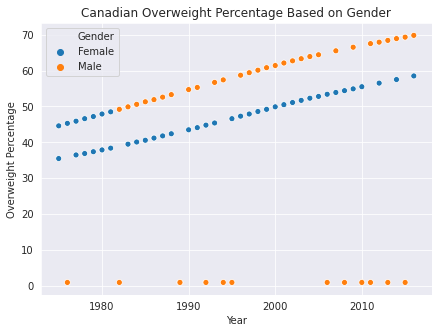

In [18]:
gender = []

for x in range(0,42):
    x = 'Female'
    gender.append(x)
for y in range(0,42):
    y ='Male'
    gender.append(y)

q3_results['Gender'] = gender

q3 = q3_results[['year', 'value', 'Gender']]
q3.columns = ['Year', 'Overweight Percentage', 'Gender']


plt.figure(figsize=(7,5))
plt.title('Canadian Overweight Percentage Based on Gender')
sns.scatterplot(x='Year', y='Overweight Percentage', hue='Gender', data=q3)

Answer 3: Both the males and females' overweight percentage has increased from 1975 to 2016. In 1975 females' overweight percentage was 35.5 and males were 44.6, in 2016 females' overweight percentage was 58.5 and males were 69.8 an increase in over 20 percent respectively.

# Question 4: What has the North American country's unemployment percentage of total labor force mostly been since 1991?

In [19]:
q5 = '''
     SELECT country_name, indicator_name, year, value
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
     WHERE indicator_code = 'SL.UEM.TOTL.ZS' AND country_name = 'Canada'
         OR indicator_code = 'SL.UEM.TOTL.ZS' AND country_name = 'United States'
         OR indicator_code = 'SL.UEM.TOTL.ZS' AND country_name = 'Mexico'
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q5_job = client.query(q5, job_config=safe_config)

q5_results = q5_job.to_dataframe()

q5_results

,country_name,indicator_name,year,value
0,Canada,"Unemployment, total (% of total labor force)",1991,10.316
1,Canada,"Unemployment, total (% of total labor force)",1992,11.197
2,Canada,"Unemployment, total (% of total labor force)",1993,11.377
3,Canada,"Unemployment, total (% of total labor force)",1994,10.395
4,Canada,"Unemployment, total (% of total labor force)",1995,9.489
5,Canada,"Unemployment, total (% of total labor force)",1996,9.620
6,Canada,"Unemployment, total (% of total labor force)",1997,9.101
7,Canada,"Unemployment, total (% of total labor force)",1998,8.278
8,Canada,"Unemployment, total (% of total labor force)",1999,7.583
9,Canada,"Unemployment, total (% of total labor force)",2000,6.829


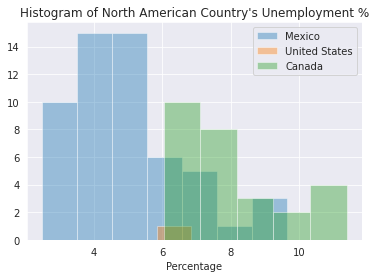

In [20]:
q5_mexico = q5_results.iloc[28:83]
q5_usa = q5_results.iloc[26:27]
q5_canada = q5_results.iloc[0:27]

sns.distplot(a=q5_mexico['value'], label='Mexico', kde=False)
sns.distplot(a=q5_usa['value'], label='United States', kde=False)
sns.distplot(a=q5_canada['value'], label='Canada', kde=False)

plt.title("Histogram of North American Country's Unemployment %")
plt.xlabel('Percentage')
plt.legend()

Answer 4: We can see from the histogram that since 1991 Canada's unemployment percentage has mostly been between 6 and 12, the United States has mostly been between 6 and 7, and Mexicos has been between 1 and 5 percent.

# Question 5: Has smoking prevalence had an impact on life expectancy for males and females?

In [21]:
q6 = '''
     WITH smoking AS
     (
         SELECT year, value AS smoking_prevalence
         FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
         WHERE indicator_code = 'SH.PRV.SMOK' AND country_name = 'Canada'
     )
     SELECT le.country_name, le.indicator_code, le.year, le.value AS life_expectancy, smoking.smoking_prevalence,
     CASE
         WHEN le.indicator_code = 'SP.DYN.LE00.FE.IN' THEN 'Female'
         ELSE 'Male'
     END AS gender
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` AS le
     RIGHT JOIN smoking
     ON le.year = smoking.year
     WHERE indicator_code = 'SP.DYN.LE00.MA.IN' AND country_name = 'Canada'
         OR indicator_code = 'SP.DYN.LE00.FE.IN' AND country_name = 'Canada'
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q6_job = client.query(q6, job_config=safe_config)

q6_results = q6_job.to_dataframe()

q6_results

,country_name,indicator_code,year,life_expectancy,smoking_prevalence,gender
0,Canada,SP.DYN.LE00.FE.IN,2000,81.8,28.2,Female
1,Canada,SP.DYN.LE00.FE.IN,2005,82.6,22.8,Female
2,Canada,SP.DYN.LE00.FE.IN,2010,83.5,18.4,Female
3,Canada,SP.DYN.LE00.FE.IN,2011,83.6,17.6,Female
4,Canada,SP.DYN.LE00.FE.IN,2012,83.8,16.9,Female
5,Canada,SP.DYN.LE00.FE.IN,2013,83.9,16.3,Female
6,Canada,SP.DYN.LE00.FE.IN,2014,83.9,15.6,Female
7,Canada,SP.DYN.LE00.MA.IN,2000,76.6,28.2,Male
8,Canada,SP.DYN.LE00.MA.IN,2005,77.9,22.8,Male
9,Canada,SP.DYN.LE00.MA.IN,2010,79.1,18.4,Male


Text(32.09049696180556, 0.5, 'Smoking Prevalence')

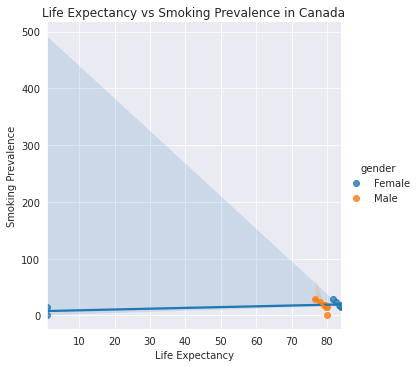

In [22]:
sns.lmplot(x="life_expectancy", y="smoking_prevalence", hue="gender", data=q6_results)
plt.title('Life Expectancy vs Smoking Prevalence in Canada')
plt.xlabel('Life Expectancy')
plt.ylabel('Smoking Prevalence')

In [23]:
q6_1 = '''
        SELECT country_name, indicator_code, year, value AS life_expectancy,
        CASE
            WHEN le.indicator_code = 'SP.DYN.LE00.FE.IN' THEN 'Female'
            ELSE 'Male'
        END AS gender
        FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` AS le
        WHERE indicator_code = 'SP.DYN.LE00.MA.IN' AND country_name = 'Canada'
            OR indicator_code = 'SP.DYN.LE00.FE.IN' AND country_name = 'Canada'
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q6_1_job = client.query(q6_1, job_config=safe_config)

q6_1_results = q6_1_job.to_dataframe()

q6_1_results

,country_name,indicator_code,year,life_expectancy,gender
0,Canada,SP.DYN.LE00.FE.IN,1960,74.15,Female
1,Canada,SP.DYN.LE00.FE.IN,1961,74.45,Female
2,Canada,SP.DYN.LE00.FE.IN,1962,74.43,Female
3,Canada,SP.DYN.LE00.FE.IN,1963,74.50,Female
4,Canada,SP.DYN.LE00.FE.IN,1964,75.08,Female
5,Canada,SP.DYN.LE00.FE.IN,1965,75.14,Female
6,Canada,SP.DYN.LE00.FE.IN,1966,75.39,Female
7,Canada,SP.DYN.LE00.FE.IN,1967,75.66,Female
8,Canada,SP.DYN.LE00.FE.IN,1968,75.78,Female
9,Canada,SP.DYN.LE00.FE.IN,1969,76.01,Female


Text(0, 0.5, 'Life Expectancy')

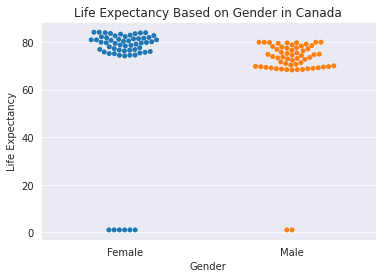

In [24]:
sns.swarmplot(x= q6_1_results['gender'], y=q6_1_results['life_expectancy'])
plt.title('Life Expectancy Based on Gender in Canada')
plt.xlabel('Gender')
plt.ylabel('Life Expectancy')

Answer 5: The lower smoking prevalence is the higher life expectancy becomes for both male and female. Also, in general females tend to have a longer life expectancy than males.

# Question 6: Create an XGBoost machine learning model that predicts the population growth of Canada for 2019.

In [26]:
q7 = '''
     SELECT * 
     FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
     WHERE indicator_code = 'SP.POP.GROW' and country_name = 'Canada'
     '''

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
q7_job = client.query(q7, job_config=safe_config)

q7_results = q7_job.to_dataframe()

q7_results

,country_name,country_code,indicator_name,indicator_code,value,year
0,Canada,CAN,Population growth (annual %),SP.POP.GROW,2.001122,1961
1,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.859888,1962
2,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.862846,1963
3,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.885715,1964
4,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.810167,1965
5,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.862814,1966
6,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.799357,1967
7,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.613409,1968
8,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.359783,1969
9,Canada,CAN,Population growth (annual %),SP.POP.GROW,1.397832,1970


[1.3967795372009277]


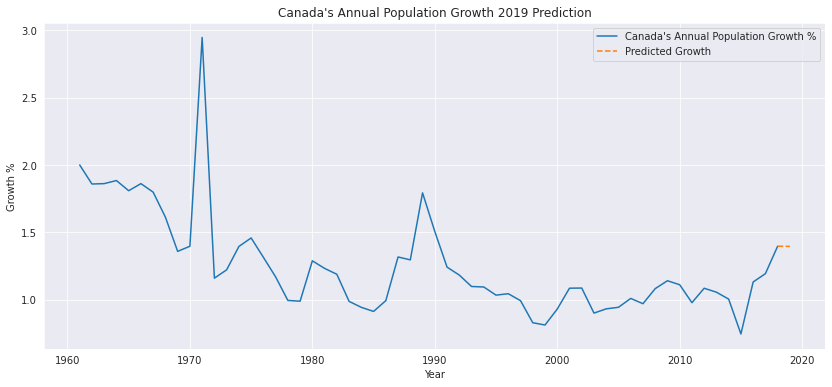

In [32]:
from xgboost import XGBRegressor

x = q7_results.year
y = q7_results.value

x_lst = []
for num in x:
    num = [num]
    x_lst.append(num)

y_lst = []
for num in y:
    num = [num]
    y_lst.append(num)

x_array = np.array(x_lst)
y_array = np.array(y_lst)

model = XGBRegressor(n_estimators = 2000)
model.fit(x_array, y_array)

prediction = model.predict(np.array([[2019]]))
prediction = prediction.tolist()

plot_data = q7_results[['year', 'value']]
plot_prediction = plot_data.iloc[-1:]
plot_prediction = plot_prediction.append({'year': 2019, 'value':prediction[0]}, ignore_index = True)

plot_data = plot_data.set_index('year')
plot_prediction = plot_prediction.set_index('year')

plt.figure(figsize=(14,6))

plt.title("Canada's Annual Population Growth 2019 Prediction")
sns.lineplot(data=plot_data['value'], label="Canada's Annual Population Growth %")
ax = sns.lineplot(data=plot_prediction['value'], label="Predicted Growth")
ax.lines[1].set_linestyle("--")
plt.xlabel("Year")
plt.ylabel('Growth %')
leg = ax.legend()
leg_lines = leg.get_lines()

print(prediction)

Answer 6: According to the created XGBoost model, Canada's population is predicted to grow by 1.4078% in 2019.